<a href="https://colab.research.google.com/github/Riadhchibani/Multi-Modal_AI/blob/main/mutli_modal_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

Data cleaning

In [4]:
dataF = pd.read_csv('/content/labels_brset.csv', sep = ',')
dataF.head()

,image_id,patient_id,camera,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,...,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other,quality
0,img00001,1,Canon CR,48.0,diabetes1,12,yes,1,1,yes,...,0,0,0,0,0,0,0,1,0,Adequate
1,img00002,1,Canon CR,48.0,diabetes1,12,yes,1,2,yes,...,0,0,0,0,0,0,0,1,0,Adequate
2,img00003,2,Canon CR,18.0,diabetes1,7,yes,2,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate
3,img00004,2,Canon CR,18.0,diabetes1,7,yes,2,2,yes,...,0,0,0,0,0,0,0,0,0,Adequate
4,img00005,3,Canon CR,22.0,diabetes1,11,yes,1,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate


In [5]:
print(dataF.columns)

Index(['image_id', 'patient_id', 'camera', 'patient_age', 'comorbidities',
       'diabetes_time_y', 'insuline', 'patient_sex', 'exam_eye', 'diabetes',
       'nationality', 'optic_disc', 'vessels', 'macula', 'DR_SDRG', 'DR_ICDR',
       'focus', 'Illuminaton', 'image_field', 'artifacts',
       'diabetic_retinopathy', 'macular_edema', 'scar', 'nevus', 'amd',
       'vascular_occlusion', 'hypertensive_retinopathy', 'drusens',
       'hemorrhage', 'retinal_detachment', 'myopic_fundus',
       'increased_cup_disc', 'other', 'quality'],
      dtype='object')


In [6]:
dataF.describe()

,patient_id,patient_age,patient_sex,exam_eye,vessels,macula,DR_SDRG,DR_ICDR,focus,Illuminaton,...,nevus,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other
count,16266.000000,10820.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,...,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000
mean,4275.474302,57.655453,1.617976,1.498647,1.049613,1.287532,0.180930,0.176933,1.033137,1.005164,...,0.007992,0.018382,0.006209,0.017460,0.174167,0.005840,0.000430,0.016599,0.197037,0.050412
std,2463.584452,18.261783,0.485897,0.500014,0.217150,0.452626,0.747103,0.722515,0.179684,0.071678,...,0.089043,0.134332,0.078556,0.130981,0.379265,0.076201,0.020741,0.127767,0.397773,0.218800
min,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2158.250000,47.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4270.000000,61.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6420.750000,71.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8524.000000,97.000000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   image_id                  16266 non-null  object 
 1   patient_id                16266 non-null  int64  
 2   camera                    16266 non-null  object 
 3   patient_age               10820 non-null  float64
 4   comorbidities             8029 non-null   object 
 5   diabetes_time_y           1910 non-null   object 
 6   insuline                  1714 non-null   object 
 7   patient_sex               16266 non-null  int64  
 8   exam_eye                  16266 non-null  int64  
 9   diabetes                  16266 non-null  object 
 10  nationality               16266 non-null  object 
 11  optic_disc                16266 non-null  object 
 12  vessels                   16266 non-null  int64  
 13  macula                    16266 non-null  int64  
 14  DR_SDR

droping all features can not help us

1.   image_id
2.   patient_id
3.   camera
4.   nationality
5.   focus
5.   Illuminaton
5.   image_field
5.   artifacts
5.   quality
5.   other

In [8]:
dataF = dataF.drop(columns=['image_id', 'patient_id', 'camera', 'nationality', 'focus', 'Illuminaton', 'image_field', 'artifacts', 'quality', 'other'])
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_age               10820 non-null  float64
 1   comorbidities             8029 non-null   object 
 2   diabetes_time_y           1910 non-null   object 
 3   insuline                  1714 non-null   object 
 4   patient_sex               16266 non-null  int64  
 5   exam_eye                  16266 non-null  int64  
 6   diabetes                  16266 non-null  object 
 7   optic_disc                16266 non-null  object 
 8   vessels                   16266 non-null  int64  
 9   macula                    16266 non-null  int64  
 10  DR_SDRG                   16266 non-null  int64  
 11  DR_ICDR                   16266 non-null  int64  
 12  diabetic_retinopathy      16266 non-null  int64  
 13  macular_edema             16266 non-null  int64  
 14  scar  

the age : filling by the mean for each gender

In [9]:
dataF['patient_age'] = dataF.groupby('patient_sex')['patient_age'].transform(lambda x: x.fillna(x.mean()))
dataF['patient_age'].describe()

,patient_age
count,16266.000000
mean,57.622969
std,14.914914
min,5.000000
25%,55.000000
50%,58.684427
75%,66.000000
max,97.000000


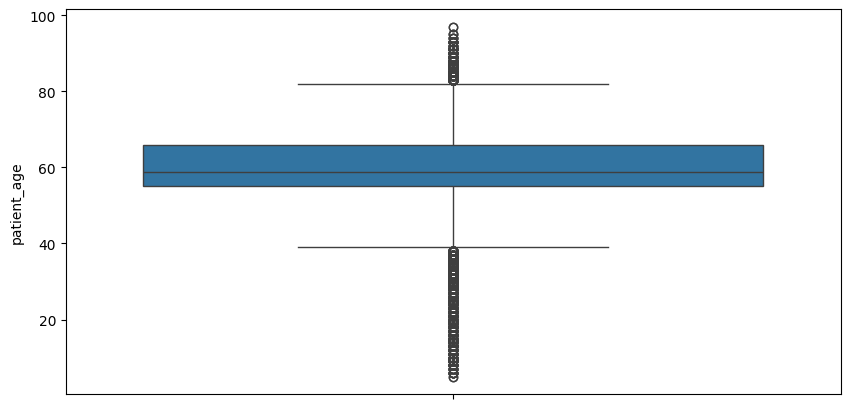

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataF['patient_age'])
plt.show()

In [11]:
print(dataF['patient_age'].describe())
print('null value count' , dataF['patient_age'].isna().sum())

count    16266.000000
mean        57.622969
std         14.914914
min          5.000000
25%         55.000000
50%         58.684427
75%         66.000000
max         97.000000
Name: patient_age, dtype: float64
null value count 0


replace and fill the missing value for the column **diabetes_time_y**

In [12]:
print(dataF['diabetes_time_y'].unique())

['12' '7' '11' '1' '20' '5' '9' '2' '3' '14' '4' '15' '23' '13' '10' '8'
 nan '16' '17' '6' '25' '18' '19' '22' '0,5' '37' '26' '40' '30' '0,20'
 '10,00' '38' '0,2' '21' '24' '35' '27' '32' '29' '45' '28' '43' '1,5'
 '50' '0,1' '49' '41' '0,3' '34' '60' '1O' '0,8' '51' 'Não' '39' '31']


In [13]:
dataF['diabetes_time_y'] = dataF['diabetes_time_y'].replace('Não', np.nan)
dataF['diabetes_time_y']

,diabetes_time_y
0,12
1,12
2,7
3,7
4,11
...,...
16261,14
16262,4
16263,4
16264,NaN


In [14]:
print(dataF['diabetes_time_y'].unique())

['12' '7' '11' '1' '20' '5' '9' '2' '3' '14' '4' '15' '23' '13' '10' '8'
 nan '16' '17' '6' '25' '18' '19' '22' '0,5' '37' '26' '40' '30' '0,20'
 '10,00' '38' '0,2' '21' '24' '35' '27' '32' '29' '45' '28' '43' '1,5'
 '50' '0,1' '49' '41' '0,3' '34' '60' '1O' '0,8' '51' '39' '31']


In [15]:
print(dataF['diabetes_time_y'].apply(type).value_counts())

diabetes_time_y
<class 'float'>    14357
<class 'str'>       1909
Name: count, dtype: int64


In [16]:
print(dataF['diabetes_time_y'].describe())
print("null value count " ,dataF['diabetes_time_y'].isna().sum())
dataF['diabetes_time_y'].unique()

count     1909
unique      54
top         10
freq       252
Name: diabetes_time_y, dtype: object
null value count  14357


array(['12', '7', '11', '1', '20', '5', '9', '2', '3', '14', '4', '15',
       '23', '13', '10', '8', nan, '16', '17', '6', '25', '18', '19',
       '22', '0,5', '37', '26', '40', '30', '0,20', '10,00', '38', '0,2',
       '21', '24', '35', '27', '32', '29', '45', '28', '43', '1,5', '50',
       '0,1', '49', '41', '0,3', '34', '60', '1O', '0,8', '51', '39',
       '31'], dtype=object)

In [17]:
dataF['diabetes_time_y'] = (
    pd.to_numeric(dataF['diabetes_time_y'], errors='coerce')  # Convert safely
    .fillna(0)                                                # Replace NaNs
    .astype(int)                                              # Final cast
)

In [18]:
dataF['diabetes_time_y'].unique()

array([12,  7, 11,  1, 20,  5,  9,  2,  3, 14,  4, 15, 23, 13, 10,  8,  0,
       16, 17,  6, 25, 18, 19, 22, 37, 26, 40, 30, 38, 21, 24, 35, 27, 32,
       29, 45, 28, 43, 50, 49, 41, 34, 60, 51, 39, 31])

In [19]:
#fill the null value by the mean of 'diabetes_time_y' column and not above the age of patient
dataF['diabetes_time_y'] = dataF.groupby('patient_age')['diabetes_time_y'].transform(lambda x: x.fillna(x.mean()))

In [20]:
print(dataF['diabetes_time_y'].describe())
print("null value count " ,dataF['diabetes_time_y'].isna().sum())
dataF['diabetes_time_y'].unique()

count    16266.000000
mean         1.503750
std          5.292643
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         60.000000
Name: diabetes_time_y, dtype: float64
null value count  0


array([12,  7, 11,  1, 20,  5,  9,  2,  3, 14,  4, 15, 23, 13, 10,  8,  0,
       16, 17,  6, 25, 18, 19, 22, 37, 26, 40, 30, 38, 21, 24, 35, 27, 32,
       29, 45, 28, 43, 50, 49, 41, 34, 60, 51, 39, 31])

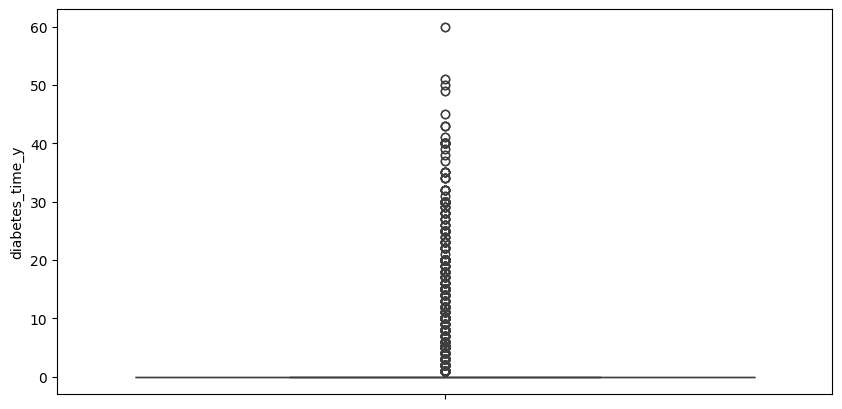

In [21]:
#boxplot for 'diabetes_time_y'
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataF['diabetes_time_y'])
plt.show()

In [22]:
# type dataF['diabetes_time_y']
print(dataF['diabetes_time_y'].apply(type).value_counts())
print((dataF['diabetes_time_y']).sum())
print((dataF['diabetes_time_y'] < 0.5).sum())

diabetes_time_y
<class 'int'>    16266
Name: count, dtype: int64
24460
14402


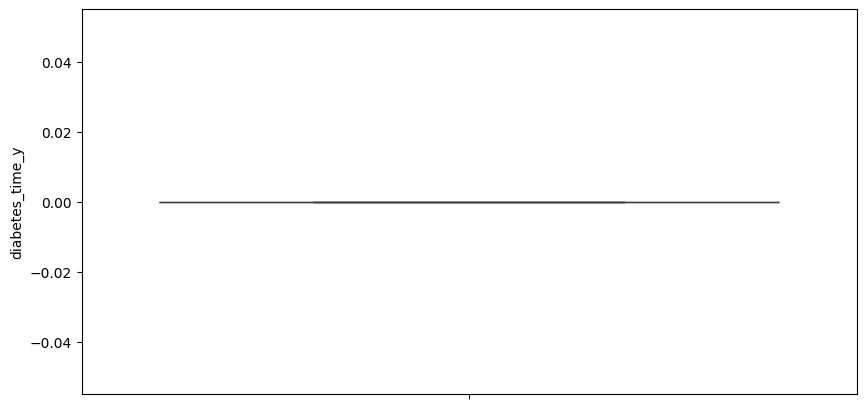

In [23]:
# first attempt
plt.figure(figsize=(10, 5))
filtered_df = dataF[dataF['diabetes_time_y'] < 0.5]
sns.boxplot(data=filtered_df['diabetes_time_y'])
plt.show()

fixing **diabtec** field

In [24]:
dataF['diabetes'].unique()

array(['yes', 'No'], dtype=object)

In [25]:
# change yes with 1 and No with 0
dataF['diabetes'] = dataF['diabetes'].replace({'yes': 1, 'No': 0})
dataF['diabetes'].unique()

array([1, 0])

fill the miss values of **insuline** field

In [26]:
dataF['insuline'].describe()

,insuline
count,1714
unique,2
top,yes
freq,893


In [27]:
print(dataF['insuline'].isna().sum())

14552


In [28]:
dataF['insuline'].unique()

array(['yes', 'no', nan], dtype=object)

In [29]:
# replace yes with 1 and no with 0 and keep the NAN value untouched
dataF['insuline'] = dataF['insuline'].replace({'yes': 1, 'no': 0})
dataF['insuline'].unique()

array([ 1.,  0., nan])

In [30]:
# Assuming your DataFrame is called df
features = ['patient_age', 'diabetes_time_y', 'diabetes', 'patient_sex',
            'diabetic_retinopathy', 'macular_edema',
            'hypertensive_retinopathy', 'vascular_occlusion']

for feature in features:
    missing_count = dataF[feature].isnull().sum()
    if missing_count != 0:
        print(f"{feature}: {missing_count} missing values")

In [31]:
features = ['patient_age', 'diabetes_time_y', 'diabetes', 'patient_sex',
            'diabetic_retinopathy', 'macular_edema',
            'hypertensive_retinopathy', 'vascular_occlusion']

# Split data into rows with known and unknown 'insuline' values
df_known = dataF[dataF['insuline'].notnull()]
df_unknown = dataF[dataF['insuline'].isnull()]

# Prepare training data
X = df_known[features]
y = df_known['insuline']

# Impute missing values in features (if any)
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Prepare data for prediction
X_unknown = df_unknown[features]
X_unknown = imputer.transform(X_unknown)

# Predict missing 'insuline' values
predicted_insuline = model.predict(X_unknown)

# Fill missing values in the original dataset
dataF.loc[dataF['insuline'].isnull(), 'insuline'] = predicted_insuline

In [32]:
dataF['insuline'] = dataF['insuline'].astype(int)

In [33]:
dataF['insuline'].unique()

array([1, 0])

In [34]:
dataF['optic_disc'].unique()

array(['1', '2', 'bv'], dtype=object)

In [35]:
dataF.count()

,0
patient_age,16266
comorbidities,8029
diabetes_time_y,16266
insuline,16266
patient_sex,16266
exam_eye,16266
diabetes,16266
optic_disc,16266
vessels,16266
macula,16266


In [36]:
matching_rows = dataF[dataF.drop('optic_disc', axis=1).eq(dataF.loc[dataF['optic_disc'] == 'bv'].iloc[0].drop('optic_disc')).all(axis=1)]

In [37]:
print(matching_rows)

Empty DataFrame
Columns: [patient_age, comorbidities, diabetes_time_y, insuline, patient_sex, exam_eye, diabetes, optic_disc, vessels, macula, DR_SDRG, DR_ICDR, diabetic_retinopathy, macular_edema, scar, nevus, amd, vascular_occlusion, hypertensive_retinopathy, drusens, hemorrhage, retinal_detachment, myopic_fundus, increased_cup_disc]
Index: []

[0 rows x 24 columns]


In [38]:
dataF.count()

,0
patient_age,16266
comorbidities,8029
diabetes_time_y,16266
insuline,16266
patient_sex,16266
exam_eye,16266
diabetes,16266
optic_disc,16266
vessels,16266
macula,16266


In [39]:
print(dataF[dataF['optic_disc'] == 'bv'])

      patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
8219    55.905915           NaN                0         1            1   

      exam_eye  diabetes optic_disc  vessels  macula  ...  scar  nevus  amd  \
8219         2         0         bv        1       1  ...     0      0    0   

      vascular_occlusion  hypertensive_retinopathy  drusens  hemorrhage  \
8219                   0                         0        0           0   

      retinal_detachment  myopic_fundus  increased_cup_disc  
8219                   0              0                   0  

[1 rows x 24 columns]


In [40]:
exclude_cols = ['optic_disc', 'patient_age', 'comorbidities']
dataF['optic_disc'] = pd.to_numeric(dataF['optic_disc'], errors='coerce')

target_row = dataF[dataF['optic_disc'].isna()].iloc[0]
matching_rows = dataF[
    dataF.drop(columns=exclude_cols)
         .eq(target_row.drop(labels=exclude_cols))
         .all(axis=1)
]
print(matching_rows)

       patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
364      66.000000  hypertension                0         1            1   
408      65.000000           NaN                0         1            1   
532      24.000000        asthma                0         1            1   
534      31.000000           NaN                0         1            1   
536      20.000000             0                0         1            1   
...            ...           ...              ...       ...          ...   
13832    55.905915           NaN                0         1            1   
13835    33.000000      epilepsy                0         1            1   
13836    55.905915           NaN                0         1            1   
13841    65.000000             0                0         1            1   
13886    55.905915           NaN                0         1            1   

       exam_eye  diabetes  optic_disc  vessels  macula  ...  scar  nevus  amd  \
364   

In [41]:
print(matching_rows['optic_disc'].unique())

[ 1.  2. nan]


In [42]:
print(matching_rows['optic_disc'].count())

822


In [43]:
print(dataF['optic_disc'].count())

16265


In [44]:
predicted_value = matching_rows['optic_disc'].mode().iloc[0]

print("Predicted optic_disc value for 'bv' row:", predicted_value)

Predicted optic_disc value for 'bv' row: 1.0


so the bv value will take 1

In [45]:
dataF.loc[dataF['optic_disc'].isna(), 'optic_disc'] = 1

In [46]:
dataF['optic_disc'] = dataF['optic_disc'].astype(int)

In [47]:
dataF['optic_disc'].unique()

array([1, 2])

In [48]:
print(dataF.dtypes)

patient_age                 float64
comorbidities                object
diabetes_time_y               int64
insuline                      int64
patient_sex                   int64
exam_eye                      int64
diabetes                      int64
optic_disc                    int64
vessels                       int64
macula                        int64
DR_SDRG                       int64
DR_ICDR                       int64
diabetic_retinopathy          int64
macular_edema                 int64
scar                          int64
nevus                         int64
amd                           int64
vascular_occlusion            int64
hypertensive_retinopathy      int64
drusens                       int64
hemorrhage                    int64
retinal_detachment            int64
myopic_fundus                 int64
increased_cup_disc            int64
dtype: object


In [49]:
dataF['patient_age'] = dataF['patient_age'].astype(int)

In [50]:
print(dataF.dtypes)

patient_age                  int64
comorbidities               object
diabetes_time_y              int64
insuline                     int64
patient_sex                  int64
exam_eye                     int64
diabetes                     int64
optic_disc                   int64
vessels                      int64
macula                       int64
DR_SDRG                      int64
DR_ICDR                      int64
diabetic_retinopathy         int64
macular_edema                int64
scar                         int64
nevus                        int64
amd                          int64
vascular_occlusion           int64
hypertensive_retinopathy     int64
drusens                      int64
hemorrhage                   int64
retinal_detachment           int64
myopic_fundus                int64
increased_cup_disc           int64
dtype: object


In [51]:
dataF.describe()

,patient_age,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,optic_disc,vessels,macula,DR_SDRG,...,scar,nevus,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc
count,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,...,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000
mean,57.363765,1.503750,0.302594,1.617976,1.498647,0.158552,1.201586,1.049613,1.287532,0.180930,...,0.017890,0.007992,0.018382,0.006209,0.017460,0.174167,0.005840,0.000430,0.016599,0.197037
std,14.923971,5.292643,0.459395,0.485897,0.500014,0.365269,0.401197,0.217150,0.452626,0.747103,...,0.132556,0.089043,0.134332,0.078556,0.130981,0.379265,0.076201,0.020741,0.127767,0.397773
min,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.000000,60.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data cleaned, except for comorbidities (to be discussed)

catch wrong data

In [52]:
# check for invalid rows where diabetes_time_y > patient_age
invalid_rows = dataF[dataF['diabetes_time_y'] > dataF['patient_age']]
print(invalid_rows[['diabetes_time_y', 'patient_age']])
print(dataF.loc[34])

     diabetes_time_y  patient_age
34                23           22
35                23           22
218               23           22
219               23           22
patient_age                        22
comorbidities               diabetes1
diabetes_time_y                    23
insuline                            1
patient_sex                         1
exam_eye                            1
diabetes                            1
optic_disc                          1
vessels                             1
macula                              1
DR_SDRG                             0
DR_ICDR                             0
diabetic_retinopathy                0
macular_edema                       0
scar                                0
nevus                               0
amd                                 0
vascular_occlusion                  0
hypertensive_retinopathy            0
drusens                             0
hemorrhage                          0
retinal_detachment              

In [53]:
target_indices = [34, 35, 218, 219]
print(dataF.loc[target_indices])
# Update diabetes_time_y to be patient_age - 1 for those rows
dataF.loc[target_indices, 'diabetes_time_y'] = dataF.loc[target_indices, 'patient_age'] - 1

     patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
34            22     diabetes1               23         1            1   
35            22     diabetes1               23         1            1   
218           22     diabetes1               23         1            2   
219           22     diabetes1               23         1            2   

     exam_eye  diabetes  optic_disc  vessels  macula  ...  scar  nevus  amd  \
34          1         1           1        1       1  ...     0      0    0   
35          2         1           1        1       1  ...     0      0    0   
218         1         1           1        2       1  ...     0      0    0   
219         2         1           1        2       1  ...     0      0    0   

     vascular_occlusion  hypertensive_retinopathy  drusens  hemorrhage  \
34                    0                         0        0           0   
35                    0                         0        0           0   
218        

In [54]:
# check for invalid rows where diabetes_time_y > patient_age
invalid_rows = dataF[dataF['diabetes_time_y'] > dataF['patient_age']]
print(invalid_rows[['diabetes_time_y', 'patient_age']])

Empty DataFrame
Columns: [diabetes_time_y, patient_age]
Index: []


In [55]:
print(dataF.loc[target_indices])

     patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
34            22     diabetes1               21         1            1   
35            22     diabetes1               21         1            1   
218           22     diabetes1               21         1            2   
219           22     diabetes1               21         1            2   

     exam_eye  diabetes  optic_disc  vessels  macula  ...  scar  nevus  amd  \
34          1         1           1        1       1  ...     0      0    0   
35          2         1           1        1       1  ...     0      0    0   
218         1         1           1        2       1  ...     0      0    0   
219         2         1           1        2       1  ...     0      0    0   

     vascular_occlusion  hypertensive_retinopathy  drusens  hemorrhage  \
34                    0                         0        0           0   
35                    0                         0        0           0   
218        

comorbidities field need to make it numeric

In [56]:
from itertools import chain

allComorbiditiesData = dataF['comorbidities'].str.split(",")
unique_comorbidities = set(chain.from_iterable(allComorbiditiesData.dropna()))
#print(unique_comorbidities)
for item in unique_comorbidities:
    if item in dataF.columns:
        print(f"✅ '{item}' exists in the columns.")
    else:
        print(f"❌ '{item}' does NOT exist in the columns.")


❌ 'albinism' does NOT exist in the columns.
❌ ' tabagism' does NOT exist in the columns.
❌ 'arrhythmia' does NOT exist in the columns.
❌ ' diabetes' does NOT exist in the columns.
❌ 'dyslipidemia' does NOT exist in the columns.
❌ 'arthritis' does NOT exist in the columns.
❌ 'syphilis' does NOT exist in the columns.
❌ ' chronic obstructive pulmonary disease' does NOT exist in the columns.
❌ ' sickle cell anemia' does NOT exist in the columns.
❌ 'behcet' does NOT exist in the columns.
❌ 'osteoporosis' does NOT exist in the columns.
❌ 'sarcoidosis' does NOT exist in the columns.
❌ ' sjogren' does NOT exist in the columns.
❌ ' ulcerative colitis' does NOT exist in the columns.
❌ 'neurofibromatosis' does NOT exist in the columns.
❌ 'leucemia' does NOT exist in the columns.
❌ 'hydrocephalus' does NOT exist in the columns.
❌ 'chronic kidney disease' does NOT exist in the columns.
❌ ' arthrosis' does NOT exist in the columns.
❌ 'devic' does NOT exist in the columns.
❌ 'cardiopathy' does NOT ex

In [57]:
diseases = [
    'cerebrovascular accident', 'rheumatoid arthritis', 'encephalic vascular accident',
    'parkinson', 'hypertension', 'hepatic transplant', 'hypocholesterolemia', 'arthritis',
    'hyperthyroidism', 'kidney transplant', 'acute myocardium infarct', 'lupus',
    'mccune albright', 'trombose', 'hypercholesterolemia', 'cardiac insufficiency',
    'intracranial hypertension', 'breast cancer', 'osteoporosis', 'cerebral palsy',
    'pulmonary embolism', 'dyslipidemia', 'chloroquine', 'juvenile arthritis',
    'human immunodeficiency virus', 'vasculitis', 'psoriasis', 'hydrocephalus',
    'albinism', 'alzheimer', 'thyroiditis', 'epilepsy', 'valvulopathy',
    'ulcerative colitis', 'cone dystrophy', 'thalassemia', 'cardiopathy', 'rhinitis',
    'chronic kidney disease', 'behcet', 'dpoc', 'sickle cell anemia', 'cirrhosis',
    'hashimoto disease', 'leucemia', 'hydroxychloroquine', 'meningioma', 'dialysis',
    'chagas', 'migraine', 'prostatic hyperplasia', 'lymphoma', 'multiple sclerosis',
    'chagas disease', 'catheterism', 'arrhythmia', 'muscular dystrophy', 'arthrosis',
    'chron disease', 'herpetic encephalitis', 'lung cancer', 'anemia',
    'adrenal hypoplasia', 'sjogren', 'brain tumor', 'vitiligo', 'intestinal cancer',
    'obesity', 'sarcoidosis', 'graves disease', 'asthma', 'hypothyroidism',
    'hepatitis c', 'hepatic cancer', 'deep vascular thrombosis',
    'syphilis', 'prolactinoma', 'hypophysis adenoma', 'epilepsia', 'tabagism',
    'down syndrome', 'hypertriglyceridemia', 'chronic obstructive pulmonary disease',
    'aneurysm', 'fibromyalgia', 'devic', 'ankylosing spondylitis', 'neurofibromatosis',
    'policitemia vera'
]

# Ensure all disease names are lowercase and unique
diseases = sorted(set(d.strip().lower() for d in diseases))

# Clean and standardize the comorbidities column
dataF['comorbidities_clean'] = dataF['comorbidities'].fillna('').str.lower()

# Create binary columns for each disease
for disease in diseases:
    dataF[disease] = dataF['comorbidities_clean'].apply(lambda x: int(disease in x))

In [58]:
dataF.columns
print(dataF.describe())

        patient_age  diabetes_time_y      insuline   patient_sex  \
count  16266.000000     16266.000000  16266.000000  16266.000000   
mean      57.363765         1.503258      0.302594      1.617976   
std       14.923971         5.290738      0.459395      0.485897   
min        5.000000         0.000000      0.000000      1.000000   
25%       55.000000         0.000000      0.000000      1.000000   
50%       58.000000         0.000000      0.000000      2.000000   
75%       66.000000         0.000000      1.000000      2.000000   
max       97.000000        60.000000      1.000000      2.000000   

           exam_eye      diabetes    optic_disc       vessels        macula  \
count  16266.000000  16266.000000  16266.000000  16266.000000  16266.000000   
mean       1.498647      0.158552      1.201586      1.049613      1.287532   
std        0.500014      0.365269      0.401197      0.217150      0.452626   
min        1.000000      0.000000      1.000000      1.000000      1.00

In [59]:
dataF['hypercholesterolemia'].loc[2134]

np.int64(1)

In [60]:
from IPython.display import display, HTML
display(HTML(dataF.to_html(max_rows=100)))

,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,optic_disc,vessels,macula,DR_SDRG,DR_ICDR,diabetic_retinopathy,macular_edema,scar,nevus,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,comorbidities_clean,acute myocardium infarct,adrenal hypoplasia,albinism,alzheimer,anemia,aneurysm,ankylosing spondylitis,arrhythmia,arthritis,arthrosis,asthma,behcet,brain tumor,breast cancer,cardiac insufficiency,cardiopathy,catheterism,cerebral palsy,cerebrovascular accident,chagas,chagas disease,chloroquine,chron disease,chronic kidney disease,chronic obstructive pulmonary disease,cirrhosis,cone dystrophy,deep vascular thrombosis,devic,dialysis,down syndrome,dpoc,dyslipidemia,encephalic vascular accident,epilepsia,epilepsy,fibromyalgia,graves disease,hashimoto disease,hepatic cancer,hepatic transplant,hepatitis c,herpetic encephalitis,human immunodeficiency virus,hydrocephalus,hydroxychloroquine,hypercholesterolemia,hypertension,hyperthyroidism,hypertriglyceridemia,hypocholesterolemia,hypophysis adenoma,hypothyroidism,intestinal cancer,intracranial hypertension,juvenile arthritis,kidney transplant,leucemia,lung cancer,lupus,lymphoma,mccune albright,meningioma,migraine,multiple sclerosis,muscular dystrophy,neurofibromatosis,obesity,osteoporosis,parkinson,policitemia vera,prolactinoma,prostatic hyperplasia,psoriasis,pulmonary embolism,rheumatoid arthritis,rhinitis,sarcoidosis,sickle cell anemia,sjogren,syphilis,tabagism,thalassemia,thyroiditis,trombose,ulcerative colitis,valvulopathy,vasculitis,vitiligo
0,48,diabetes1,12,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,diabetes1,12,1,1,2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18,diabetes1,7,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18,diabetes1,7,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22,diabetes1,11,1,1,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,22,diabetes1,11,1,1,2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,22,diabetes1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,22,diabetes1,1,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,23,diabetes1,20,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,23,diabetes1,20,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [62]:
#check if any type of columns type Object or string
object_columns = dataF.select_dtypes(include=['object', 'string']).columns
print("Columns with object or string dtype:")
print(object_columns.tolist())

dataF.drop(columns=['comorbidities', 'comorbidities_clean'], inplace=True)

Columns with object or string dtype:
['comorbidities', 'comorbidities_clean']


In [63]:
object_columns = dataF.select_dtypes(include=['object', 'string']).columns
print("Columns with object or string dtype:")
print(object_columns.tolist())

Columns with object or string dtype:
[]


In [64]:
from IPython.display import display, HTML

dtypes_df = dataF.dtypes.to_frame(name='Data Type')

# Use .to_html() without .render()
html = dtypes_df.style.set_table_attributes('style="display:inline"').to_html()

display(HTML(html))

,Data Type
patient_age,int64
diabetes_time_y,int64
insuline,int64
patient_sex,int64
exam_eye,int64
diabetes,int64
optic_disc,int64
vessels,int64
macula,int64
DR_SDRG,int64
